In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import xgboost as xg
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import metrics as ms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
# files = ['Test.csv', 'Train.csv']
# df = pd.DataFrame()

# for file in files:
#     data = pd.read_csv(file)
#     df = pd.concat([df, data], axis = 0)

# df.to_csv('merged_file.csv', index = False)

In [3]:
new_df = pd.read_excel('merged.xlsx', sheet_name='merged')
drop_df = pd.read_excel('merged.xlsx', sheet_name='merged')
drop_df.dropna(inplace=True)

print('shape for train data', new_df.shape, '\n')
print('shape for train data', drop_df.shape, '\n')
print('duplicated info about new_df data', new_df.duplicated().sum())

FileNotFoundError: [Errno 2] No such file or directory: 'merged.xlsx'

In [ ]:
new_df

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,...,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target,Higher_Education,Maths,Language
0,Id_r90136smvl,2022-08-03,3,other,NaN,Urban,KwaZulu-Natal,1,0,0,...,NaN,40 - 49 %,0,1,2002,12,NaN,0,0 - 29 %,50 - 59 %
1,Id_wawdqhmu6s,2023-03-16,4,unemployed,979.0,Urban,Western Cape,1,0,0,...,NaN,NaN,1,1,1989,12,NaN,0,NaN,40 - 49 %
2,Id_ap2czff2bu,2023-03-14,4,unemployed,339.0,Urban,KwaZulu-Natal,0,0,0,...,NaN,NaN,1,1,1989,12,NaN,0,NaN,NaN
3,Id_uhgink7iha,2023-02-16,4,studying,NaN,Urban,Gauteng,1,0,0,...,NaN,NaN,0,1,2002,11,NaN,0,80 - 100 %,60 - 69 %
4,Id_5j6bzk3k81,2023-03-23,4,unemployed,613.0,Urban,Gauteng,0,0,0,...,NaN,NaN,1,1,1993,10,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5949,Id_3lxfvtmbkr,2023-02-13,4,wage employed,273.0,Rural,Limpopo,1,0,0,...,NaN,NaN,1,1,2000,1,0.0,0,40 - 49 %,50 - 59 %
5950,Id_u3uc3v9pts,2023-02-02,4,unemployed,401.0,Urban,Gauteng,1,0,1,...,NaN,NaN,0,1,1999,3,0.0,1,40 - 49 %,60 - 69 %
5951,Id_enkksj5q5r,2023-03-20,4,unemployed,2287.0,Urban,KwaZulu-Natal,0,0,0,...,NaN,NaN,1,1,1991,10,0.0,0,NaN,NaN
5952,Id_3rtpd7kc1g,2022-03-15,2,studying,NaN,Urban,Eastern Cape,1,0,0,...,NaN,50 - 59 %,1,1,2000,1,1.0,0,40 - 49 %,60 - 69 %


In [ ]:
new_df.drop(columns=['Math', 'Mathlit', 'Additional_lang', 'Home_lang', 'Sa_citizen'], inplace=True)

In [ ]:
print('null columns from the new_df: ')
new_df[new_df.columns[new_df.isna().any()]]

null columns from the new_df: 


,Tenure,Schoolquintile,Science,Target,Maths,Language
0,NaN,2.0,40 - 49 %,NaN,0 - 29 %,50 - 59 %
1,979.0,NaN,NaN,NaN,NaN,40 - 49 %
2,339.0,1.0,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,NaN,80 - 100 %,60 - 69 %
4,613.0,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
5949,273.0,2.0,NaN,0.0,40 - 49 %,50 - 59 %
5950,401.0,NaN,NaN,0.0,40 - 49 %,60 - 69 %
5951,2287.0,1.0,NaN,0.0,NaN,NaN
5952,NaN,3.0,50 - 59 %,1.0,40 - 49 %,60 - 69 %


In [ ]:
new_df.rename(columns = {'Female':'Gender'}, inplace = True)

# EDUCATION

In [ ]:
new_df['Maths'].fillna('unknown', inplace=True)
new_df['Language'].fillna('unknown', inplace=True)
new_df['Science'].fillna('unknown', inplace=True)
new_df

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Science,Gender,Birthyear,Birthmonth,Target,Higher_Education,Maths,Language
0,Id_r90136smvl,2022-08-03,3,other,NaN,Urban,KwaZulu-Natal,1,0,0,2.0,40 - 49 %,0,2002,12,NaN,0,0 - 29 %,50 - 59 %
1,Id_wawdqhmu6s,2023-03-16,4,unemployed,979.0,Urban,Western Cape,1,0,0,NaN,unknown,1,1989,12,NaN,0,unknown,40 - 49 %
2,Id_ap2czff2bu,2023-03-14,4,unemployed,339.0,Urban,KwaZulu-Natal,0,0,0,1.0,unknown,1,1989,12,NaN,0,unknown,unknown
3,Id_uhgink7iha,2023-02-16,4,studying,NaN,Urban,Gauteng,1,0,0,1.0,unknown,0,2002,11,NaN,0,80 - 100 %,60 - 69 %
4,Id_5j6bzk3k81,2023-03-23,4,unemployed,613.0,Urban,Gauteng,0,0,0,5.0,unknown,1,1993,10,NaN,0,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5949,Id_3lxfvtmbkr,2023-02-13,4,wage employed,273.0,Rural,Limpopo,1,0,0,2.0,unknown,1,2000,1,0.0,0,40 - 49 %,50 - 59 %
5950,Id_u3uc3v9pts,2023-02-02,4,unemployed,401.0,Urban,Gauteng,1,0,1,NaN,unknown,0,1999,3,0.0,1,40 - 49 %,60 - 69 %
5951,Id_enkksj5q5r,2023-03-20,4,unemployed,2287.0,Urban,KwaZulu-Natal,0,0,0,1.0,unknown,1,1991,10,0.0,0,unknown,unknown
5952,Id_3rtpd7kc1g,2022-03-15,2,studying,NaN,Urban,Eastern Cape,1,0,0,3.0,50 - 59 %,1,2000,1,1.0,0,40 - 49 %,60 - 69 %


In [ ]:
print('Numeric info for Schoolquintile: \n')
print('Minimum value: ', new_df['Schoolquintile'].min(), '\n')
print('Median value: ', new_df['Schoolquintile'].median(), '\n')
print('Maximum value: ', new_df['Schoolquintile'].max(), '\n')
print('Mode value: ', new_df['Schoolquintile'].mode(), '\n')

mean = new_df['Schoolquintile'].mean()
print('mean value: ', mean.round())

Numeric info for Schoolquintile: 

Minimum value:  0.0 

Median value:  3.0 

Maximum value:  5.0 

Mode value:  0    3.0
Name: Schoolquintile, dtype: float64 

mean value:  3.0


In [ ]:
new_df['Schoolquintile'].ffill(inplace=True)

In [ ]:
print('Numeric info for Schoolquintile: \n')
print('Minimum value: ', new_df['Schoolquintile'].min(), '\n')
print('Median value: ', new_df['Schoolquintile'].median(), '\n')
print('Maximum value: ', new_df['Schoolquintile'].max(), '\n')
print('Mode value: ', new_df['Schoolquintile'].mode(), '\n')

mean = new_df['Schoolquintile'].mean()
print('mean value: ', mean.round())

Numeric info for Schoolquintile: 

Minimum value:  0.0 

Median value:  3.0 

Maximum value:  5.0 

Mode value:  0    3.0
Name: Schoolquintile, dtype: float64 

mean value:  3.0


In [ ]:
new_df.skew()

/var/folders/dt/6wlrtxmd13nfmwf1shtvq5t40000gq/T/ipykernel_69743/3313494185.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.skew()


Round              -0.676295
Tenure              1.640213
Matric             -0.558119
Degree              4.486976
Diploma             4.467182
Schoolquintile      0.107967
Gender             -0.235466
Birthyear          -1.217874
Birthmonth          0.271482
Target              1.025746
Higher_Education    2.931523
dtype: float64

In [ ]:
print('Numeric info for Tenure: \n')
print('Minimum value: ', new_df['Tenure'].min(), '\n')
print('Median value: ', new_df['Tenure'].median(), '\n')
print('Maximum value: ', new_df['Tenure'].max(), '\n')
print('Mode value: ', new_df['Tenure'].mode(), '\n')

mean = new_df['Tenure'].mean()
print('mean value: ', mean.round())

Numeric info for Tenure: 

Minimum value:  0.0 

Median value:  370.0 

Maximum value:  3621.0 

Mode value:  0    0.0
Name: Tenure, dtype: float64 

mean value:  584.0


In [ ]:
new_df['Tenure'].bfill(inplace=True)

In [ ]:
new_df.skew()

/var/folders/dt/6wlrtxmd13nfmwf1shtvq5t40000gq/T/ipykernel_69743/3313494185.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.skew()


Round              -0.676295
Tenure              1.598087
Matric             -0.558119
Degree              4.486976
Diploma             4.467182
Schoolquintile      0.107967
Gender             -0.235466
Birthyear          -1.217874
Birthmonth          0.271482
Target              1.025746
Higher_Education    2.931523
dtype: float64

#### Variable Information: Tenure and Round
##### 'round' is the round of the survey. The data for this challenge comes from four rounds of a survey of youth in the South African labour market, conducted at 6-month intervals.

##### 'tenure' is the length of time the person has been in the labour market activity.

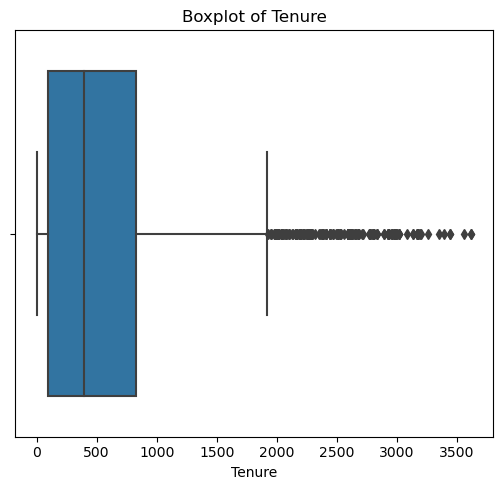

In [ ]:
# Create a 1x3 grid of subplots
plt.figure(figsize=(15, 5))

# First subplot
plt.subplot(131)
sns.boxplot(x=new_df['Tenure'])
plt.title('Boxplot of Tenure')

# # Second subplot
# plt.subplot(132)
# sns.boxplot(x=new_df['Matric'])
# plt.title('Boxplot of Matric')

# # Third subplot
# plt.subplot(133)
# sns.boxplot(x=new_df['Degree'])
# plt.title('Boxplot of Degree')

# Adjust the layout to avoid overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
new_df.drop(new_df[new_df['Tenure'] >= 2500].index, inplace = True)

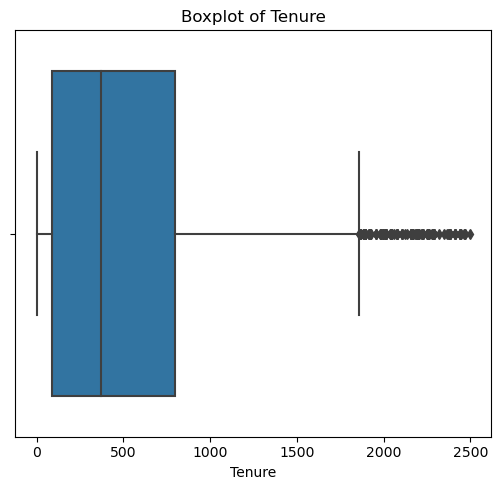

In [ ]:
# Create a 1x3 grid of subplots
plt.figure(figsize=(15, 5))

# First subplot
plt.subplot(131)
sns.boxplot(x=new_df['Tenure'])
plt.title('Boxplot of Tenure')

# # Second subplot
# plt.subplot(132)
# sns.boxplot(x=new_df['Matric'])
# plt.title('Boxplot of Matric')

# # Third subplot
# plt.subplot(133)
# sns.boxplot(x=new_df['Degree'])
# plt.title('Boxplot of Degree')

# Adjust the layout to avoid overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

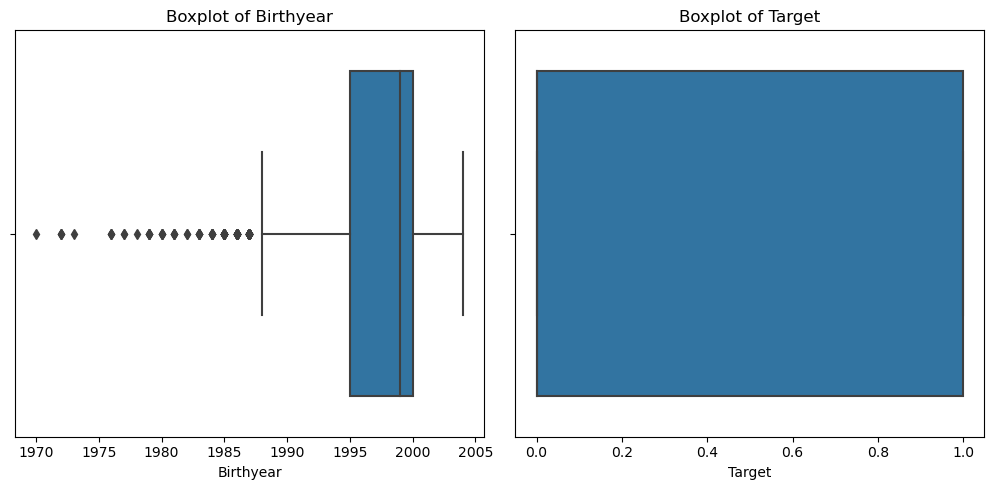

In [ ]:
# Create a 1x3 grid of subplots
plt.figure(figsize=(15, 5))

# # First subplot
# plt.subplot(131)
# sns.boxplot(x=new_df['Diploma'])
# plt.title('Boxplot of Diploma')

# Second subplot
plt.subplot(132)
sns.boxplot(x=new_df['Birthyear'])
plt.title('Boxplot of Birthyear')

# Third subplot
plt.subplot(133)
sns.boxplot(x=new_df['Target'])
plt.title('Boxplot of Target')

# Adjust the layout to avoid overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

#### Definitions of youth vary considerably amongst countries. The United Nations defines the youth as those aged between 15 and 24 years.  The United Nations, however, recognises that each region may have its own specific definition of youth. In South Africa, youth consists of those aged 15 to 34 years

In [ ]:
new_df.drop(new_df[new_df['Birthyear'] <= 1989].index, inplace = True)

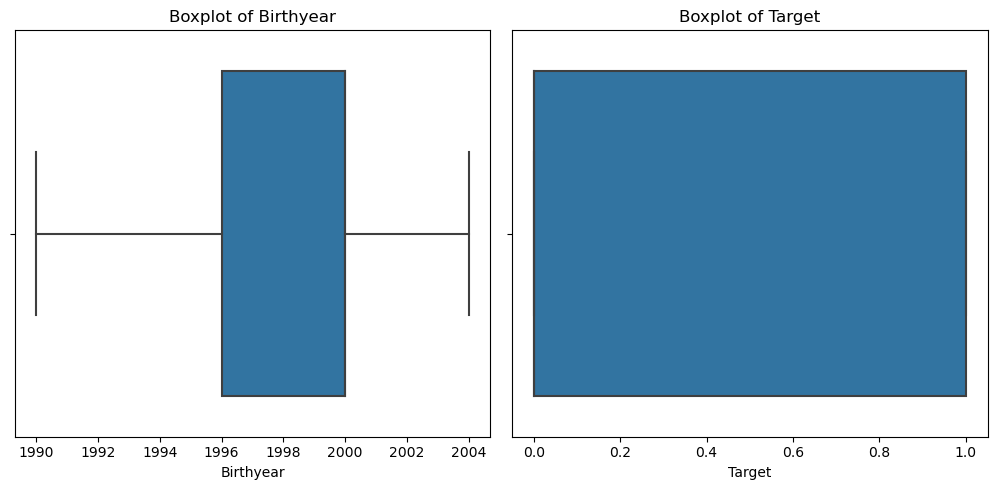

In [ ]:
# Create a 1x3 grid of subplots
plt.figure(figsize=(15, 5))

# # First subplot
# plt.subplot(131)
# sns.boxplot(x=new_df['Diploma'])
# plt.title('Boxplot of Diploma')

# Second subplot
plt.subplot(132)
sns.boxplot(x=new_df['Birthyear'])
plt.title('Boxplot of Birthyear')

# Third subplot
plt.subplot(133)
sns.boxplot(x=new_df['Target'])
plt.title('Boxplot of Target')

# Adjust the layout to avoid overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
new_df.skew()

/var/folders/dt/6wlrtxmd13nfmwf1shtvq5t40000gq/T/ipykernel_69743/3313494185.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.skew()


Round              -0.695063
Tenure              1.247870
Matric             -0.624453
Degree              4.498328
Diploma             4.588101
Schoolquintile      0.106935
Gender             -0.231074
Birthyear          -0.739744
Birthmonth          0.309365
Target              1.061707
Higher_Education    2.981210
dtype: float64

In [ ]:
new_df.isnull().sum()

Person_id              0
Survey_date            0
Round                  0
Status                 0
Tenure                 0
Geography              0
Province               0
Matric                 0
Degree                 0
Diploma                0
Schoolquintile         0
Science                0
Gender                 0
Birthyear              0
Birthmonth             0
Target              1769
Higher_Education       0
Maths                  0
Language               0
dtype: int64

In [ ]:
new_df.value_counts('Target')

Target
0.0    2701
1.0     977
dtype: int64

In [ ]:
print('Numeric info for Target: \n')
print('Minimum value: ', new_df['Target'].min(), '\n')
print('Median value: ', new_df['Target'].median(), '\n')
print('Maximum value: ', new_df['Target'].max(), '\n')
print('Mode value: ', new_df['Target'].mode(), '\n')

mean = new_df['Target'].mean()
print('mean value: ', mean.round())

Numeric info for Target: 

Minimum value:  0.0 

Median value:  0.0 

Maximum value:  1.0 

Mode value:  0    0.0
Name: Target, dtype: float64 

mean value:  0.0


In [ ]:
print(new_df[new_df['Target'] == 1].value_counts('Matric'), '\n')
print(new_df[new_df['Target'] == 0].value_counts('Matric'))

Matric
1    697
0    280
dtype: int64 

Matric
1    1701
0    1000
dtype: int64


In [ ]:
print(new_df[new_df['Target'] == 1].value_counts('Degree'), '\n')
print(new_df[new_df['Target'] == 0].value_counts('Degree'))

Degree
0    919
1     58
dtype: int64 

Degree
0    2603
1      98
dtype: int64


In [ ]:
print(new_df[new_df['Target'] == 1].value_counts('Diploma'), '\n')
print(new_df[new_df['Target'] == 0].value_counts('Diploma'))

Diploma
0    914
1     63
dtype: int64 

Diploma
0    2605
1      96
dtype: int64


In [ ]:
new_df

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Science,Gender,Birthyear,Birthmonth,Target,Higher_Education,Maths,Language
0,Id_r90136smvl,2022-08-03,3,other,979.0,Urban,KwaZulu-Natal,1,0,0,2.0,40 - 49 %,0,2002,12,NaN,0,0 - 29 %,50 - 59 %
3,Id_uhgink7iha,2023-02-16,4,studying,613.0,Urban,Gauteng,1,0,0,1.0,unknown,0,2002,11,NaN,0,80 - 100 %,60 - 69 %
4,Id_5j6bzk3k81,2023-03-23,4,unemployed,613.0,Urban,Gauteng,0,0,0,5.0,unknown,1,1993,10,NaN,0,unknown,unknown
5,Id_r1njgsuhs9,2023-02-27,4,unemployed,5.0,Rural,Limpopo,0,0,0,5.0,unknown,0,1992,6,NaN,0,unknown,unknown
6,Id_d9n59ghzjb,2022-02-24,2,studying,401.0,Urban,Gauteng,1,0,0,5.0,unknown,1,1993,9,NaN,0,50 - 59 %,60 - 69 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5949,Id_3lxfvtmbkr,2023-02-13,4,wage employed,273.0,Rural,Limpopo,1,0,0,2.0,unknown,1,2000,1,0.0,0,40 - 49 %,50 - 59 %
5950,Id_u3uc3v9pts,2023-02-02,4,unemployed,401.0,Urban,Gauteng,1,0,1,2.0,unknown,0,1999,3,0.0,1,40 - 49 %,60 - 69 %
5951,Id_enkksj5q5r,2023-03-20,4,unemployed,2287.0,Urban,KwaZulu-Natal,0,0,0,1.0,unknown,1,1991,10,0.0,0,unknown,unknown
5952,Id_3rtpd7kc1g,2022-03-15,2,studying,243.0,Urban,Eastern Cape,1,0,0,3.0,50 - 59 %,1,2000,1,1.0,0,40 - 49 %,60 - 69 %


In [ ]:
new_df.value_counts('Target')

Target
0.0    2701
1.0     977
dtype: int64

In [ ]:
new_df.skew()

/var/folders/dt/6wlrtxmd13nfmwf1shtvq5t40000gq/T/ipykernel_69743/3313494185.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.skew()


Round              -0.695063
Tenure              1.247870
Matric             -0.624453
Degree              4.498328
Diploma             4.588101
Schoolquintile      0.106935
Gender             -0.231074
Birthyear          -0.739744
Birthmonth          0.309365
Target              1.061707
Higher_Education    2.981210
dtype: float64

In [ ]:
new_df['Gender'].value_counts()

1    3036
0    2411
Name: Gender, dtype: int64

In [ ]:
new_df.value_counts(new_df['Status'], ascending=True)

Status
wage and self employed       8
employment programme        42
self employed              241
other                      357
wage employed             1034
studying                  1406
unemployed                2359
dtype: int64

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5447 entries, 0 to 5953
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Person_id         5447 non-null   object        
 1   Survey_date       5447 non-null   datetime64[ns]
 2   Round             5447 non-null   int64         
 3   Status            5447 non-null   object        
 4   Tenure            5447 non-null   float64       
 5   Geography         5447 non-null   object        
 6   Province          5447 non-null   object        
 7   Matric            5447 non-null   int64         
 8   Degree            5447 non-null   int64         
 9   Diploma           5447 non-null   int64         
 10  Schoolquintile    5447 non-null   float64       
 11  Science           5447 non-null   object        
 12  Gender            5447 non-null   int64         
 13  Birthyear         5447 non-null   int64         
 14  Birthmonth        5447 n

In [ ]:
new_df = new_df.astype({'Person_id':'string', 'Round':'float', 'Status':'string', 'Tenure':'float', 'Geography':'string',
            'Province':'string', 'Matric':'string',
            # 'Degree':'string', 'Diploma':'string', 
            'Schoolquintile':'float',
            # 'Maths':'string', 'Mathlit':'string', 'Additional_lang':'string', 'Home_lang':'string',
            'Science':'string', 'Gender':'float', 'Birthyear':'float', 'Birthmonth':'float', 'Target':'string'})

## Feature Engineering

In [ ]:
label_encoder = LabelEncoder()

# Iterate over each column in the DataFrame and encode the values
for col in new_df.columns:
    new_df[col] = label_encoder.fit_transform(new_df[col])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['NAType', 'str']

## Correlation

In [ ]:
plt.figure(figsize=(20, 16))
sns.heatmap(new_df.corr(), annot=True, fmt='.2f', linewidths= 0.5)
plt.show()

In [ ]:
new_df.columns

In [ ]:
# X = new_df [['Person_id', 'Survey_date', 'Round', 'Status', 'Tenure', 'Geography',
#             'Province', 'Matric', 'Degree', 'Diploma', 'Schoolquintile', 'Math',
#             'Mathlit', 'Additional_lang', 'Home_lang', 'Science', 'Female',
#             'Birthyear', 'Birthmonth', 'Target']]
X = new_df.drop('Target', axis=1)
y = new_df['Target']
 
# scale= StandardScaler()

# # standardization 
# scaled = scale.fit_transform(X)
# scaled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)

## Univariate Selection

In [ ]:
x = X_train
y = y_train

# Create a DataFrame to store the column names of the feature matrix X_train
names = pd.DataFrame(X_train.columns)

model = SelectKBest(score_func=f_regression, k=4)
results = model.fit(x, y)

print(results.scores_)
# print(results.pvalues_)

results_df = pd.DataFrame(results.scores_)
# Concat and name columns
scored = pd.concat([names, results_df], axis=1)
scored.columns = ["Feature", "Score"]
scored.sort_values(by=['Score'], inplace=True)  # Sort by score in ascending order

print(scored)

## Multicollinearity

In [ ]:
# vif = pd.DataFrame()
# vif['Features'] = X.columns
# vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# # Check for multicollinearity
# print(vif)

## Variance Threshhold

In [ ]:
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.3) #Removing both constant and quasi-constant
var_thr.fit(X)

var_thr.get_support()